In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import math
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics as stats
import scipy
from scipy.stats.stats import pearsonr
from matplotlib import style
import warnings
import seaborn as sns
import requests
import bs4 as bs
import os
import csv
from openpyxl.workbook import Workbook as wb
from openpyxl import load_workbook
from openpyxl.styles import Font
from openpyxl.utils.dataframe import dataframe_to_rows
from pylab import rcParams
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
warnings.filterwarnings('ignore') 

In [2]:
'''USE FF_Research_Data, col (RM-RF) + col (RF) = RM(t) to generate beta
Annual Excess Return: rp(t) – RF(t) , where RF(t) comes from FF.
R_j(t) = RF(t) + beta_j*( RM-RF  ), rewrite differently
R_j(t) – RF(t) =  ( RM(t)-RF(t)  )*beta_j'''

'USE FF_Research_Data, col (RM-RF) + col (RF) = RM(t) to generate beta\nAnnual Excess Return: rp(t) – RF(t) , where RF(t) comes from FF.\nR_j(t) = RF(t) + beta_j*( RM-RF  ), rewrite differently\nR_j(t) – RF(t) =  ( RM(t)-RF(t)  )*beta_j'

In [3]:
data = pd.read_excel('stock_returns_data.xlsx')

In [4]:
df = data[['Names Date','Ticker Symbol','Returns']]

In [5]:
df = df[pd.to_numeric(df['Returns'], errors='coerce').notnull()]

In [6]:
df['Date'] = df['Names Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df

,Names Date,Ticker Symbol,Returns,Date
0,20070131,EWST,0.023279,2007-01-31
1,20070228,EWST,0.261621,2007-02-28
2,20070330,EWST,0.019732,2007-03-30
3,20070430,EWST,0.002764,2007-04-30
4,20070531,EWST,0.043418,2007-05-31
...,...,...,...,...
1048568,20191129,VT,0.025614,2019-11-29
1048569,20191231,VT,0.034494,2019-12-31
1048572,20080731,SZR,0.076445,2008-07-31
1048573,20080829,SZR,-0.040735,2008-08-29


In [7]:
df['Returns']=df['Returns']*100
df1 = df[['Date','Ticker Symbol','Returns']]
df1['Date'] = df1['Date'].map(lambda x: 100*x.year + x.month)
df1['Date'] = df1['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))
df1

,Date,Ticker Symbol,Returns
0,2007-01-01,EWST,2.3279
1,2007-02-01,EWST,26.1621
2,2007-03-01,EWST,1.9732
3,2007-04-01,EWST,0.2764
4,2007-05-01,EWST,4.3418
...,...,...,...
1048568,2019-11-01,VT,2.5614
1048569,2019-12-01,VT,3.4494
1048572,2008-07-01,SZR,7.6445
1048573,2008-08-01,SZR,-4.0735


In [8]:
df1 = df1[(df1['Date'] > '2014-12') & (df1['Date'] < '2020-01')]
df1.head(50)

,Date,Ticker Symbol,Returns
96,2015-01-01,EGAS,-11.5245
97,2015-02-01,EGAS,3.5897
98,2015-03-01,EGAS,-0.0495
99,2015-04-01,EGAS,1.1044
100,2015-05-01,EGAS,-0.6951
101,2015-06-01,EGAS,3
102,2015-07-01,EGAS,-1.3107
103,2015-08-01,EGAS,-11.1665
104,2015-09-01,EGAS,0.3367
105,2015-10-01,EGAS,0.1678


In [9]:
df1 = df1.dropna(subset=['Ticker Symbol'])

In [10]:
fama = pd.read_excel('FF_Research_Data_Factors.xlsx')
fama = fama[['Date','Mkt-RF','RF']]
fama['Returns'] = fama['Mkt-RF']+fama['RF']
fama['Ticker Symbol']='SP500'
fama1 = fama[['Date','Ticker Symbol','Returns','RF']]
fama1['Date'] = fama1['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))
fama1

,Date,Ticker Symbol,Returns,RF
0,1926-07-01,SP500,3.18,0.22
1,1926-08-01,SP500,2.89,0.25
2,1926-09-01,SP500,0.59,0.23
3,1926-10-01,SP500,-2.92,0.32
4,1926-11-01,SP500,2.84,0.31
...,...,...,...,...
1120,2019-11-01,SP500,3.99,0.12
1121,2019-12-01,SP500,2.91,0.14
1122,2020-01-01,SP500,0.02,0.13
1123,2020-02-01,SP500,-8.01,0.12


In [11]:
dfAll = pd.concat([df1,fama1])
dfAll = dfAll.reset_index()
dfAll = dfAll[(dfAll['Date'] > '2014-12-31') & (dfAll['Date'] < '2019-12-31')]
dfAll = dfAll[['Date','Ticker Symbol','Returns','RF']]
dfAll

,Date,Ticker Symbol,Returns,RF
0,2015-01-01,EGAS,-11.5245,NaN
1,2015-02-01,EGAS,3.5897,NaN
2,2015-03-01,EGAS,-0.0495,NaN
3,2015-04-01,EGAS,1.1044,NaN
4,2015-05-01,EGAS,-0.6951,NaN
...,...,...,...,...
413746,2019-08-01,SP500,-2.42,0.16
413747,2019-09-01,SP500,1.62,0.18
413748,2019-10-01,SP500,2.21,0.15
413749,2019-11-01,SP500,3.99,0.12


In [12]:
stock_count = dfAll.groupby('Ticker Symbol')['Returns'].count()
stock_count = stock_count[stock_count == 60]
stocks = [*stock_count.keys()]
stocks

['A',
 'AADR',
 'AAL',
 'AAMC',
 'AAME',
 'AAN',
 'AAOI',
 'AAON',
 'AAP',
 'AAPL',
 'AAT',
 'AAU',
 'AAWW',
 'AB',
 'ABB',
 'ABBV',
 'ABC',
 'ABCB',
 'ABDC',
 'ABEV',
 'ABG',
 'ABIO',
 'ABM',
 'ABMD',
 'ABR',
 'ABT',
 'ACAD',
 'ACC',
 'ACCO',
 'ACGL',
 'ACH',
 'ACHC',
 'ACHN',
 'ACIW',
 'ACLS',
 'ACM',
 'ACN',
 'ACNB',
 'ACOR',
 'ACP',
 'ACRE',
 'ACRX',
 'ACST',
 'ACTG',
 'ACU',
 'ACWI',
 'ACWV',
 'ACWX',
 'ACY',
 'ADBE',
 'ADC',
 'ADI',
 'ADM',
 'ADMA',
 'ADMP',
 'ADMS',
 'ADP',
 'ADRA',
 'ADRD',
 'ADRE',
 'ADRU',
 'ADS',
 'ADSK',
 'ADTN',
 'ADX',
 'ADXS',
 'AE',
 'AEE',
 'AEG',
 'AEGN',
 'AEHR',
 'AEIS',
 'AEL',
 'AEM',
 'AEO',
 'AEP',
 'AER',
 'AERI',
 'AES',
 'AEY',
 'AEZS',
 'AFB',
 'AFG',
 'AFH',
 'AFL',
 'AFMD',
 'AFT',
 'AG',
 'AGCO',
 'AGD',
 'AGEN',
 'AGG',
 'AGI',
 'AGIO',
 'AGNC',
 'AGND',
 'AGO',
 'AGRO',
 'AGRX',
 'AGTC',
 'AGX',
 'AGYS',
 'AGZD',
 'AHC',
 'AHH',
 'AHPI',
 'AHT',
 'AI',
 'AIA',
 'AIF',
 'AIG',
 'AIMC',
 'AIN',
 'AINC',
 'AINV',
 'AIR',
 'AIRI',
 'AIRR',


In [13]:
dfAll1 = dfAll.loc[dfAll['Ticker Symbol'].isin(stocks)]
dfAll1.tail(60)

,Date,Ticker Symbol,Returns,RF
413691,2015-01-01,SP500,-3.11,0.00
413692,2015-02-01,SP500,6.13,0.00
413693,2015-03-01,SP500,-1.12,0.00
413694,2015-04-01,SP500,0.59,0.00
413695,2015-05-01,SP500,1.36,0.00
413696,2015-06-01,SP500,-1.53,0.00
413697,2015-07-01,SP500,1.54,0.00
413698,2015-08-01,SP500,-6.04,0.00
413699,2015-09-01,SP500,-3.08,0.00
413700,2015-10-01,SP500,7.75,0.00


In [14]:
df_row = web.DataReader('VEA','yahoo','2014-12-21','2020-02-01')
df_row = df_row.reset_index()
df_row = df_row[['Date','Adj Close']]
df_row = df_row.resample('M', on='Date').last()
df_row = df_row[['Adj Close']]
df_row['Monthly Return'] = df_row['Adj Close'].pct_change()*100
df_row['ROW']=df_row['Monthly Return']
df_row = df_row[['ROW']]
df_row = df_row.reset_index()
df_row = df_row[(df_row['Date'] > '2014-12-31') & (df_row['Date'] < '2018-01-20')]
df_row = df_row.set_index('Date')
df_row['RiskFree']=fama1['RF'].iloc[-63:-27].values
df_row['ExcessReturn']=df_row['ROW']-df_row['RiskFree']
row = df_row['ExcessReturn'].values
row

array([ 0.7127538 ,  6.1599019 , -1.21833511,  3.86640908, -0.04837092,
       -2.9107556 ,  1.46278837, -7.23340286, -4.08032533,  6.73400445,
       -0.76236966, -2.14359917, -5.53833554, -3.10446529,  7.17096381,
        2.30324499, -0.30965469, -2.07967061,  4.13721452,  0.38729469,
        1.61785893, -2.42580591, -1.51638177,  2.41851907,  3.62722434,
        1.01593714,  3.02843938,  2.16374528,  3.35050747,  0.57727504,
        2.80993648, -0.06646896,  2.4243013 ,  1.68378009,  0.78011653,
        1.56415031])

In [15]:
###Beta calculations###
###Want monthly return beta from 2015 to 2017###
dfAll1.reset_index()
dfBeta = dfAll1[(dfAll1['Date'] > '2014-12-31') & (dfAll1['Date'] < '2017-12-31')]
dfBeta = dfBeta.reset_index()
dfBeta = dfBeta[['Date','Ticker Symbol','Returns','RF']]
dfBeta

,Date,Ticker Symbol,Returns,RF
0,2015-01-01,JJSF,-9.7913,NaN
1,2015-02-01,JJSF,3.1288,NaN
2,2015-03-01,JJSF,5.801,NaN
3,2015-04-01,JJSF,-2.2212,NaN
4,2015-05-01,JJSF,3.326,NaN
...,...,...,...,...
159403,2017-08-01,SP500,0.25,0.09
159404,2017-09-01,SP500,2.6,0.09
159405,2017-10-01,SP500,2.34,0.09
159406,2017-11-01,SP500,3.2,0.08


In [16]:
symbols = dfBeta.groupby('Ticker Symbol')
market_df = symbols.get_group('SP500')
market_df = market_df[['Date','Returns']].set_index('Date')
table = dfBeta.pivot(index='Date',columns='Ticker Symbol',values='Returns')  
table['RiskFree'] = fama1['RF'].iloc[-63:-27].values
table['ROW'] = row
table1 = table.reset_index()
table1

Ticker Symbol,Date,A,AADR,AAL,AAMC,AAME,AAN,AAOI,AAON,AAP,...,ZIXI,ZMLP,ZN,ZNGA,ZNH,ZTR,ZTS,ZUMZ,RiskFree,ROW
0,2015-01-01,-7.4988,-2.5773,-8.4841,-48.4071,-0.9926,3.5656,-20.3209,-2.5904,-0.1758,...,-1.6667,0.4197,9.4891,-3.7594,10.8787,-1.2134,-0.5043,-3.4688,0.00,0.712754
1,2015-02-01,11.7554,7.5791,-2.2005,10.6563,0.2506,-5.8433,39.5973,3.2095,-2.5598,...,12.9944,2.706,30.6667,-10.1563,-5.9245,2.3127,7.8633,4.103,0.00,6.159902
2,2015-03-01,-1.3267,-1.2917,10.1879,4.5637,0.75,-4.9547,11.218,8.9738,-3.3434,...,-1.75,-4.6253,-11.2245,23.913,44.5648,-1.495,0.4339,3.6837,0.00,-1.218335
3,2015-04-01,-0.4332,4.0653,-8.327,20.9961,-1.2407,20.0989,2.8818,-2.2829,-4.4692,...,8.397,6.4739,16.092,-14.0351,36.071,-0.0804,-3.8605,-21.2174,0.00,3.866409
4,2015-05-01,-0.4351,0.0124,-12.2502,-23.933,-4.0404,3.0294,25.07,-1.2516,7.1469,...,7.7465,-4.9292,-1.9802,20.4082,1.407,-0.4492,12.0441,-5.8341,0.00,-0.048371
5,2015-06-01,-6.0937,-3.6773,-5.747,-15.3178,-4.7368,3.4342,-2.7996,-4.3937,4.0008,...,12.6362,-10.1211,-3.5354,-3.0509,17.3135,-2.9859,-3.1143,-10.8172,0.00,-2.910756
6,2015-07-01,6.1431,3.6491,0.4132,-8.1225,2.7624,2.1265,12.0392,-1.4654,9.3666,...,-5.6093,-5.0702,-7.8534,-13.2867,-14.9349,-0.9505,1.5761,-1.9902,0.00,1.462788
7,2015-08-01,-11.3309,-6.8414,-2.5436,-70.9663,-3.2258,1.8118,5.964,-6.8049,0.597,...,-10.2459,-4.5993,-15.3409,2.0161,-36.6937,-5.7659,-8.2217,-10.6897,0.00,-7.233403
8,2015-09-01,-5.1776,-4.1935,-0.3848,-37.776,12.2222,-4.0292,-8.8792,-6.2863,8.1826,...,-3.8813,-13.5602,-4.0268,-9.8814,17.142,-3.4341,-8.2238,-32.9472,0.00,-4.080325
9,2015-10-01,9.9913,8.6139,19.0317,2.714,9.1584,-31.681,9.7977,5.6244,4.6958,...,23.0404,8.6939,39.8601,3.9474,15.2352,6.4781,4.4439,11.8362,0.00,6.734004


In [26]:
s = table1.columns[1:]
s

Index(['A', 'AADR', 'AAL', 'AAMC', 'AAME', 'AAN', 'AAOI', 'AAON', 'AAP',
       'AAPL',
       ...
       'ZIXI', 'ZMLP', 'ZN', 'ZNGA', 'ZNH', 'ZTR', 'ZTS', 'ZUMZ', 'RiskFree',
       'ROW'],
      dtype='object', name='Ticker Symbol', length=4430)

In [27]:
beta_df = []
for stock in s:
    table1[stock] = table1[stock]-table1['RiskFree']
    beta_df.append({'Date':table1['Date'], 'Ticker':stock, 'ExcessReturn': table1[stock]})
beta_df = pd.DataFrame(beta_df)
beta_df1 = beta_df.set_index(['Ticker']).apply(pd.Series.explode).reset_index()

In [30]:
beta_df2 = beta_df1.pivot(index='Date',columns='Ticker',values='ExcessReturn')
beta_df2
#beta_df2['ROW'] = row
#beta_df2['ROW']

Ticker,A,AADR,AAL,AAMC,AAME,AAN,AAOI,AAON,AAP,AAPL,...,ZION,ZIOP,ZIXI,ZMLP,ZN,ZNGA,ZNH,ZTR,ZTS,ZUMZ
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,-7.4988,-2.5773,-8.4841,-48.4071,-0.9926,3.5656,-20.3209,-2.5904,-0.1758,6.1424,...,-15.9593,76.5286,-1.6667,0.4197,9.4891,-3.7594,10.8787,-1.2134,-0.5043,-3.4688
2015-02-01,11.7554,7.5791,-2.2005,10.6563,0.2506,-5.8433,39.5973,3.2095,-2.5598,10.0461,...,11.7488,25.8101,12.9944,2.706,30.6667,-10.1563,-5.9245,2.3127,7.8633,4.103
2015-03-01,-1.3267,-1.2917,10.1879,4.5637,0.75,-4.9547,11.218,8.9738,-3.3434,-3.1372,...,0.9912,-4.3517,-1.75,-4.6253,-11.2245,23.913,44.5648,-1.495,0.4339,3.6837
2015-04-01,-0.4332,4.0653,-8.327,20.9961,-1.2407,20.0989,2.8818,-2.2829,-4.4692,0.5786,...,4.9444,-18.1987,8.397,6.4739,16.092,-14.0351,36.071,-0.0804,-3.8605,-21.2174
2015-05-01,-0.4351,0.0124,-12.2502,-23.933,-4.0404,3.0294,25.07,-1.2516,7.1469,4.5146,...,2.1352,7.605,7.7465,-4.9292,-1.9802,20.4082,1.407,-0.4492,12.0441,-5.8341
2015-06-01,-6.0937,-3.6773,-5.747,-15.3178,-4.7368,3.4342,-2.7996,-4.3937,4.0008,-3.7266,...,9.8857,26.5823,12.6362,-10.1211,-3.5354,-3.0509,17.3135,-2.9859,-3.1143,-10.8172
2015-07-01,6.1431,3.6491,0.4132,-8.1225,2.7624,2.1265,12.0392,-1.4654,9.3666,-3.2888,...,-1.7173,11.3333,-5.6093,-5.0702,-7.8534,-13.2867,-14.9349,-0.9505,1.5761,-1.9902
2015-08-01,-11.3309,-6.8414,-2.5436,-70.9663,-3.2258,1.8118,5.964,-6.8049,0.597,-6.6117,...,-6.8291,-34.8054,-10.2459,-4.5993,-15.3409,2.0161,-36.6937,-5.7659,-8.2217,-10.6897
2015-09-01,-5.1776,-4.1935,-0.3848,-37.776,12.2222,-4.0292,-8.8792,-6.2863,8.1826,-2.1816,...,-5.0345,3.4443,-3.8813,-13.5602,-4.0268,-9.8814,17.142,-3.4341,-8.2238,-32.9472


In [49]:
y = beta_df2[['A']].values
x = beta_df2[['SP500', 'ROW']] 
regr = linear_model.LinearRegression()
regr.fit(x, y)
model = sm.OLS(y.astype(float), x.astype(float)).fit()
beta = model.params
beta

SP500    1.116405
ROW      0.491529
dtype: float64

In [50]:
equities = beta_df2.columns
main_df = []
for equity in equities:
    y = beta_df2[[equity]].values
    x = beta_df2[['SP500', 'ROW']] 
    regr = linear_model.LinearRegression()
    regr.fit(x, y)
    model = sm.OLS(y.astype(float), x.astype(float)).fit()
    predictions = model.predict(x) 
    beta = regr.coef_
    main_df.append({'Ticker':equity, 'Beta': beta})
main_df = pd.DataFrame(main_df)
main_df

,Ticker,Beta
0,A,"[[1.0901156158284517, 0.494985456442266]]"
1,AADR,"[[0.14053246454858173, 0.8833778225567546]]"
2,AAL,"[[1.9388567144341895, -0.8978697746030838]]"
3,AAMC,"[[-1.6861486604054836, 3.907847622983215]]"
4,AAME,"[[0.7538360019191289, -0.4525197399605677]]"
...,...,...
4425,ZNGA,"[[0.4348499736933139, 0.09539841572325572]]"
4426,ZNH,"[[-0.2108897019202407, 1.7155201979455557]]"
4427,ZTR,"[[0.20979760862561025, 0.5724317448163506]]"
4428,ZTS,"[[0.9262812292261113, 0.34267239769873437]]"


In [51]:
equities = beta_df2.columns
main_df = []
for equity in equities:    
    y = beta_df2[[equity]].values
    x = beta_df2[['SP500', 'ROW']] 
    regr = linear_model.LinearRegression()
    regr.fit(x, y)
    model = sm.OLS(y.astype(float), x.astype(float)).fit()
    beta = model.params 
    main_df.append({'Ticker':equity, 'Beta': beta[0], 'Gamma': beta[1]})
main_df = pd.DataFrame(main_df)
main_df

,Ticker,Beta,Gamma
0,A,1.116405,0.491529
1,AADR,0.202217,0.875268
2,AAL,1.857816,-0.887216
3,AAMC,-1.721816,3.912537
4,AAME,0.697016,-0.445050
...,...,...,...
4425,ZNGA,0.546428,0.080730
4426,ZNH,0.038824,1.682692
4427,ZTR,0.230273,0.569740
4428,ZTS,0.981546,0.335407


In [52]:
main_df1 = main_df.set_index('Ticker')
#main_df1.to_excel('beta_regression.xlsx')

In [53]:
x = main_df1.index
drop = x[3433]
x = x.drop(drop)
x

Index(['A', 'AADR', 'AAL', 'AAMC', 'AAME', 'AAN', 'AAOI', 'AAON', 'AAP',
       'AAPL',
       ...
       'ZION', 'ZIOP', 'ZIXI', 'ZMLP', 'ZN', 'ZNGA', 'ZNH', 'ZTR', 'ZTS',
       'ZUMZ'],
      dtype='object', name='Ticker', length=4429)

In [ ]:
df_stock_returns = dfAll1[(dfAll1['Date'] > '2017-12-20') & (dfAll1['Date'] < '2019-12-31')]
stock_annual_returns = df_stock_returns.loc[df_stock_returns['Ticker Symbol'].isin(stocks)]
stock_returns = stock_annual_returns.pivot(index='Date',columns='Ticker Symbol',values='Returns')
stock_returns['Risk Free Rate'] = fama1['RF'].iloc[-27:-3].values
stock_returns = stock_returns.reset_index()
z = stock_returns.columns
z = z[1:]
stock_returns_previous = []
for item in z:
    excess_returns = stock_returns[item]-stock_returns['Risk Free Rate']
    stock_returns_previous.append({'Ticker':item, 'Excess Return': excess_returns[item].sum()})
stock_returns_previous = pd.DataFrame(stock_returns_previous)
stock_returns_previous

In [ ]:
stock_returns_previous['Annual Excess Return'] = stock_returns_previous['Excess Return']/2
excess_return_df = stock_returns_previous[['Ticker', 'Annual Excess Return']].set_index('Ticker')
#excess_return_df.to_excel('ExcessReturnRegression.xlsx')

In [54]:
main = pd.read_excel('beta_regression_gammasorted.xlsx')

In [55]:
x = main.columns[2]
type(x)

str

In [105]:
main['Ticker']

0       RAVE
1       NVCN
2       BRZU
3       BCEI
4       CGIX
        ... 
4423    HIIQ
4424    NSPR
4425    KBSF
4426    GLBS
4427    SINO
Name: Ticker, Length: 4428, dtype: object

In [82]:
###gamma of each portfolio sorted from highest to lowest beta
group_size = 442
portfolios = [main.iloc[i:i+group_size] for i in range(0,len(main)-group_size+1,group_size)]   
portfolio_gammas = []
for portfolio in portfolios:
    g = (portfolio['Gamma'].mean())
    portfolio_gammas.append({'Gamma':g})
portfolio_gammas = pd.DataFrame(portfolio_gammas)
portfolio_gammas

,Gamma
0,2.092398
1,1.028046
2,0.651433
3,0.401893
4,0.197469
5,-0.011847
6,-0.246393
7,-0.552669
8,-0.957776
9,-1.830629


In [79]:
###annual returns of each portfolio sorted from highest to lowest gamma
group_size = 442
portfolios = [main.iloc[i:i+group_size] for i in range(0,len(main)-group_size+1,group_size)]   
portfolio_returns = []
for portfolio in portfolios:
    er = (portfolio['Annual Excess Return'].mean())
    portfolio_returns.append({'Annual Excess Returns': er})
portfolio_returns = pd.DataFrame(portfolio_returns)
portfolio_returns

,Annual Excess Returns
0,3.597827
1,3.506882
2,7.393542
3,6.898510
4,7.701186
5,7.674459
6,6.652575
7,4.561609
8,7.232882
9,4.731469


In [78]:
###annual returns of each portfolio sorted from highest to lowest gamma
group_size = 442
portfolios = [main.iloc[i:i+group_size] for i in range(0,len(main)-group_size+1,group_size)]   
betas=[]
for portfolio in portfolios:
    b = (portfolio['Beta'].mean())
    betas.append({'Beta':b})
betas = pd.DataFrame(betas)
betas

,Beta
0,-0.560812
1,0.045626
2,0.225359
3,0.362441
4,0.549898
5,0.831465
6,1.162789
7,1.478609
8,1.898343
9,2.747502


In [94]:
graph_df = pd.concat([portfolio_gammas,betas,portfolio_returns],axis=1)
graph_df['Portfolio']=graph_df.index+1
graph_df = graph_df.set_index('Portfolio')
graph_df

,Gamma,Beta,Annual Excess Returns
Portfolio,,,
1,2.092398,-0.560812,3.597827
2,1.028046,0.045626,3.506882
3,0.651433,0.225359,7.393542
4,0.401893,0.362441,6.898510
5,0.197469,0.549898,7.701186
6,-0.011847,0.831465,7.674459
7,-0.246393,1.162789,6.652575
8,-0.552669,1.478609,4.561609
9,-0.957776,1.898343,7.232882


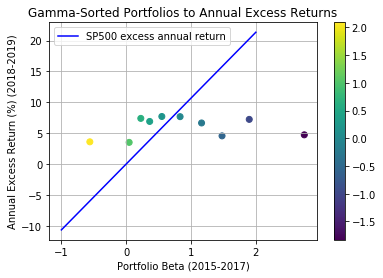

In [142]:
plt.scatter(x = graph_df['Beta'], y=graph_df['Annual Excess Returns'], c=graph_df['Gamma'])
plt.title('Gamma-Sorted Portfolios to Annual Excess Returns')
plt.xlabel('Portfolio Beta (2015-2017)')
plt.ylabel('Annual Excess Return (%) (2018-2019)')
x = np.linspace(-1,2,2)
y = 10.675*x
plt.plot(x, y, '-b', label='SP500 excess annual return')
plt.legend(loc='upper left')
plt.grid()
plt.colorbar()
plt.show()